In [1]:
#https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
color = sns.color_palette()
pd.options.mode.chained_assignment = None

In [2]:
from subprocess import check_output
print(check_output(["ls", "./input"]).decode('utf8'))

aisles.csv
departments.csv
order_products__prior.csv
order_products__train.csv
orders.csv
products.csv
sample_submission.csv



In [3]:
order_products_train_df = pd.read_csv("./input/order_products__train.csv")
order_products_prior_df = pd.read_csv("./input/order_products__prior.csv")
orders_df = pd.read_csv("./input/orders.csv")
products_df = pd.read_csv("./input/products.csv")
aisles_df = pd.read_csv("./input/aisles.csv")
departments_df = pd.read_csv("./input/departments.csv")

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64


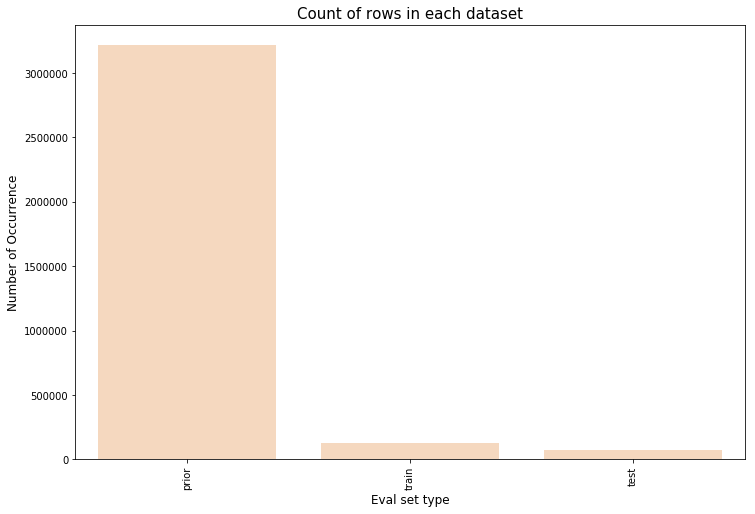

In [4]:
# prior, train, test dataset 확인

cnt_srs = orders_df.eval_set.value_counts()
print(cnt_srs)

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.3, color=color[1])
plt.xlabel('Eval set type', fontsize=12)
plt.ylabel('Number of Occurrence', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

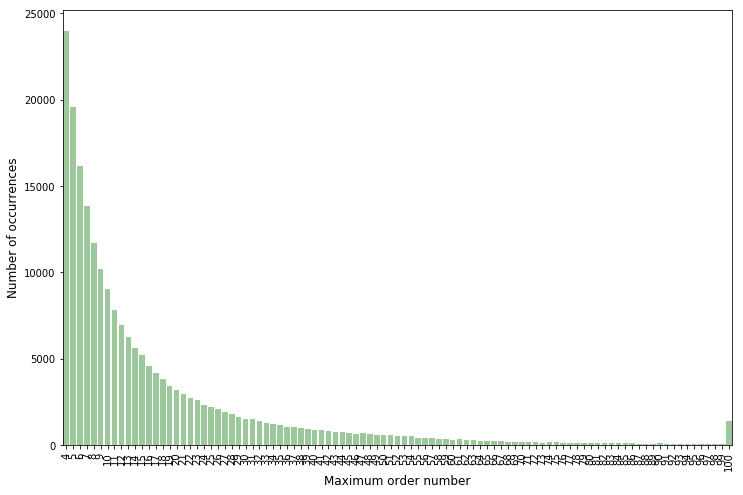

In [5]:
# 고객당 한번주문시 주문품목 갯수 확인

cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.5, color=color[2])
plt.xlabel('Maximum order number', fontsize=12)
plt.ylabel('Number of occurrences', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

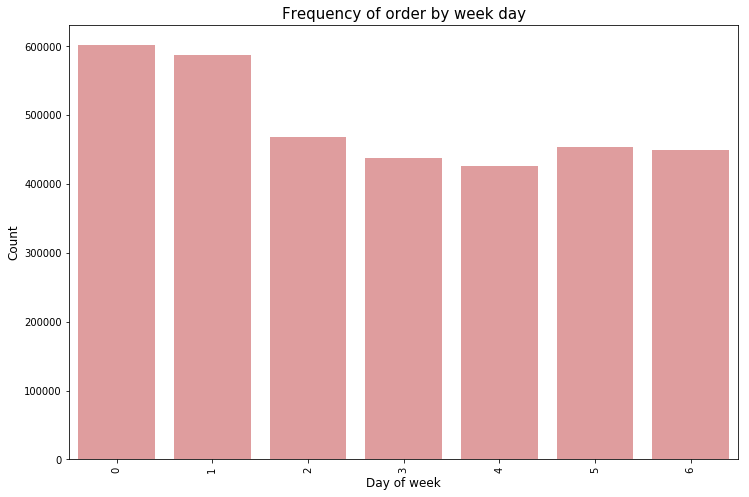

In [6]:
# 고객은 일주일 중 어느 요일에 주로 물품 주문하는지 확인

plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders_df, alpha=0.5, color=color[3])
plt.xlabel('Day of week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

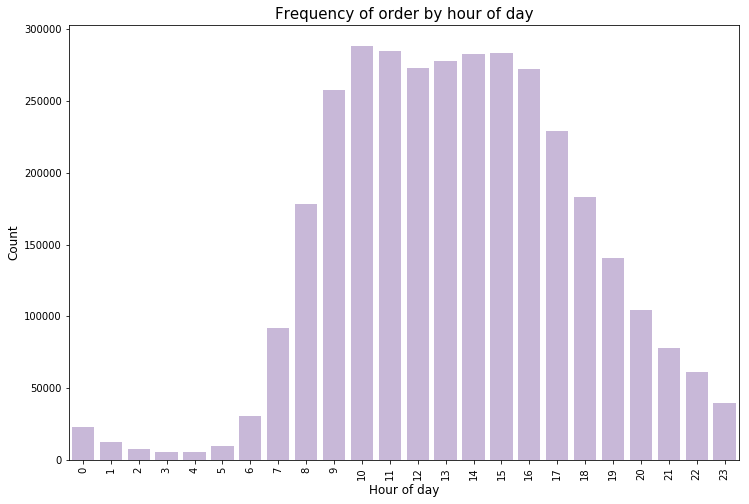

In [7]:
# 고객은 하루 중 어느 시간대에 주로 물품 주문하는지 확인

plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df, alpha=0.5, color=color[4])
plt.xlabel('Hour of day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

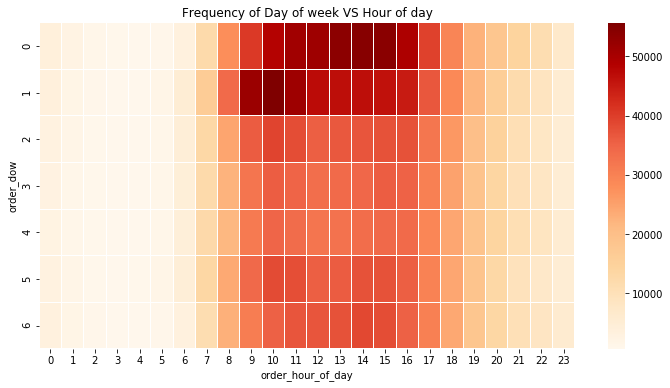

In [8]:
# 일자와 시간에 대해서 주문 수량 히트맵 표현

grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df, linewidths=0.01, cmap="OrRd")
plt.title("Frequency of Day of week VS Hour of day")
plt.show()

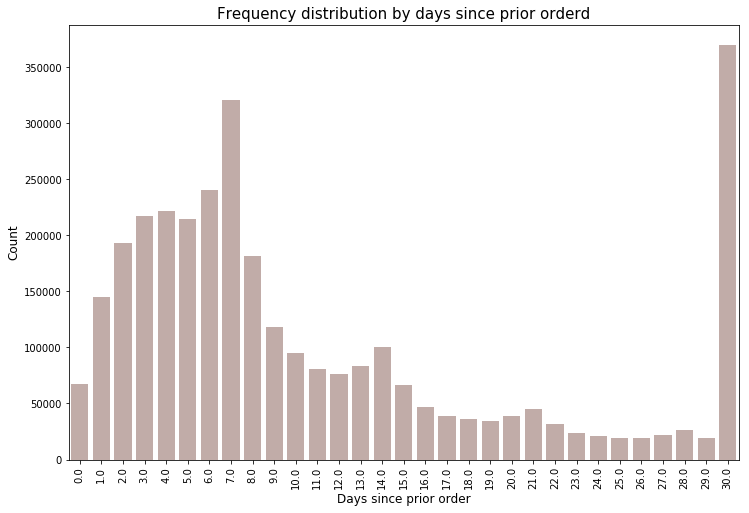

In [9]:
# 첫 구매 후, 언제 다시 재구매를 하는지

plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df, alpha=0.5, color=color[5])
plt.xlabel('Days since prior order', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior orderd", fontsize=15)
plt.show()

In [10]:
# 재구매 가능성

print(order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0])
print(order_products_train_df.reordered.sum() / order_products_train_df.shape[0])

0.589697466792
0.598594412751


In [11]:
grouped_df = order_products_prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].loc[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts()/grouped_df.shape[0]

1    0.879151
0    0.120849
Name: reordered, dtype: float64

In [12]:
grouped_df = order_products_train_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].loc[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts()/grouped_df.shape[0]

1    0.93444
0    0.06556
Name: reordered, dtype: float64

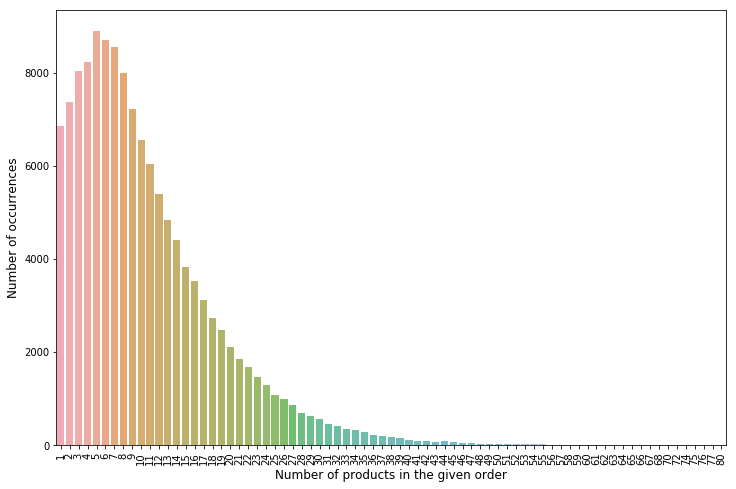

In [13]:
# 소비자가 한번 구매할 때, 사는 물품 개수

grouped_df = order_products_train_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.ylabel('Number of occurrences', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [17]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [19]:
cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index().head()
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584


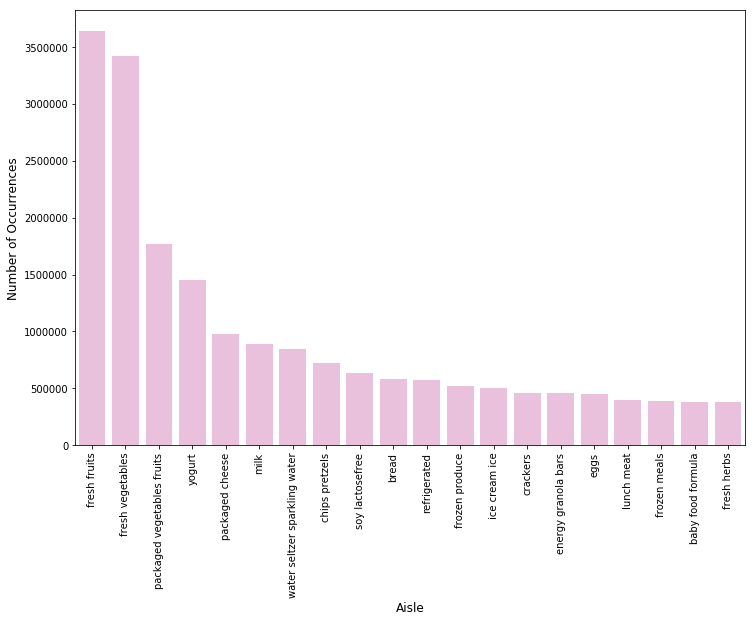

In [22]:
cnt_srs = order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.5, color=color[6])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

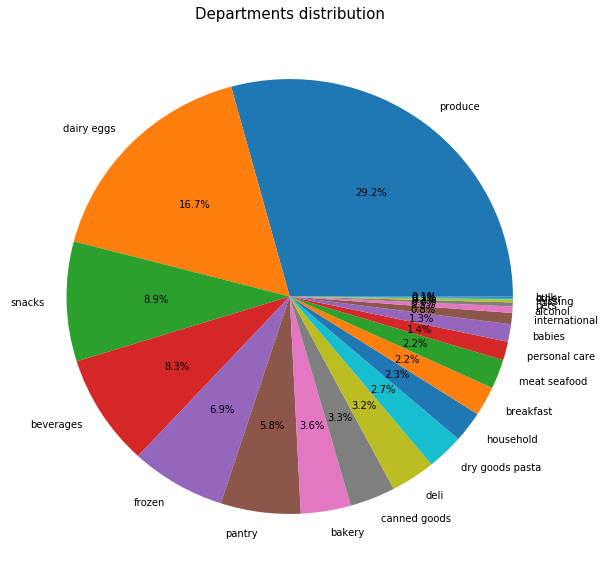

In [26]:
# Department wise:

plt.figure(figsize=(10,10))
temp_series = order_products_prior_df['department'].value_counts()
labels = np.array(temp_series.index)
sizes = np.array((temp_series / temp_series.sum())*100)
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=0)
plt.title("Departments distribution", fontsize=15)
plt.show()

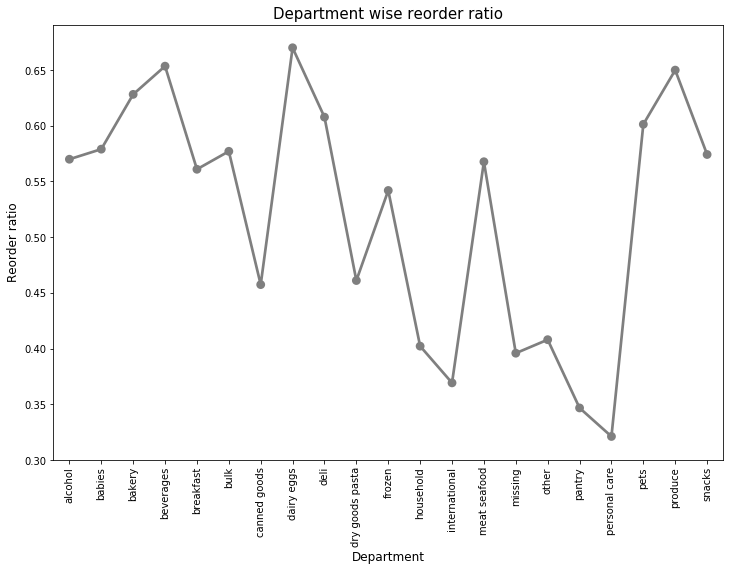

In [28]:
grouped_df = order_products_prior_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.5, color=color[7])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

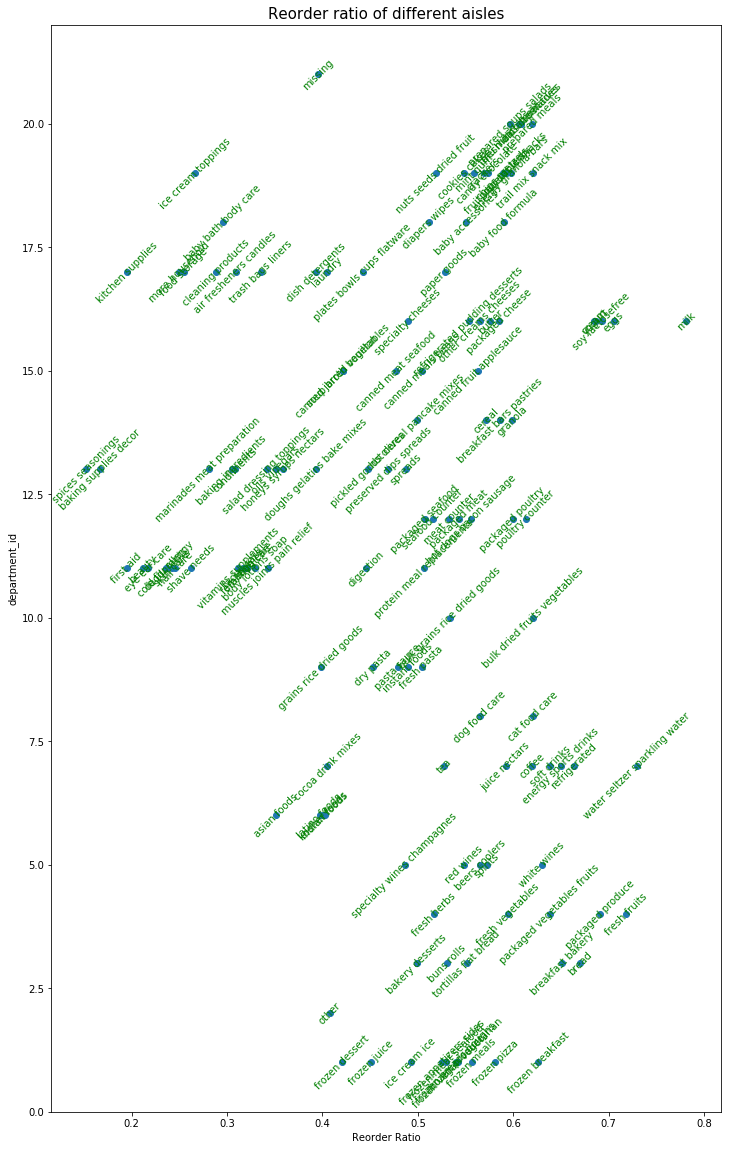

In [29]:
grouped_df = order_products_prior_df.groupby(["department_id", "aisle"])["reordered"].aggregate("mean").reset_index()

fig, ax = plt.subplots(figsize=(12,20))
ax.scatter(grouped_df.reordered.values, grouped_df.department_id.values)
for i, txt in enumerate(grouped_df.aisle.values):
    ax.annotate(txt, (grouped_df.reordered.values[i], grouped_df.department_id.values[i]), rotation=45, ha='center', va='center', color='green')
plt.xlabel('Reorder Ratio')
plt.ylabel('department_id')
plt.title("Reorder ratio of different aisles", fontsize=15)
plt.show()

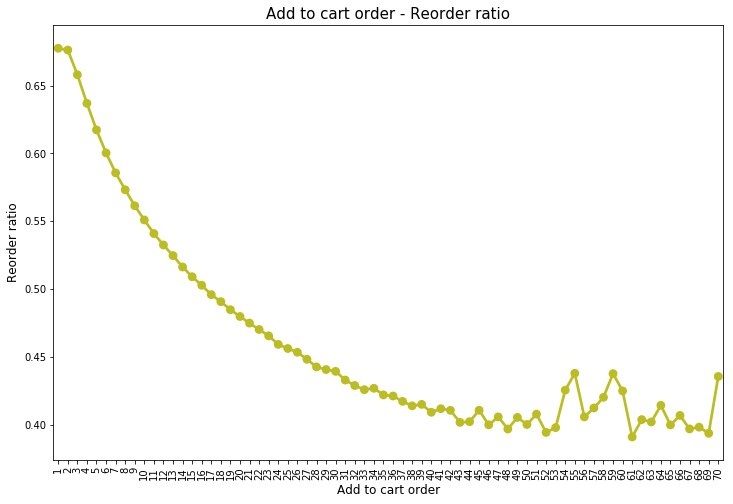

In [32]:
order_products_prior_df["add_to_cart_order_mod"] = order_products_prior_df["add_to_cart_order"].copy()
order_products_prior_df["add_to_cart_order_mod"].loc[order_products_prior_df["add_to_cart_order_mod"]>70] = 70
grouped_df = order_products_prior_df.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.5, color=color[8])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

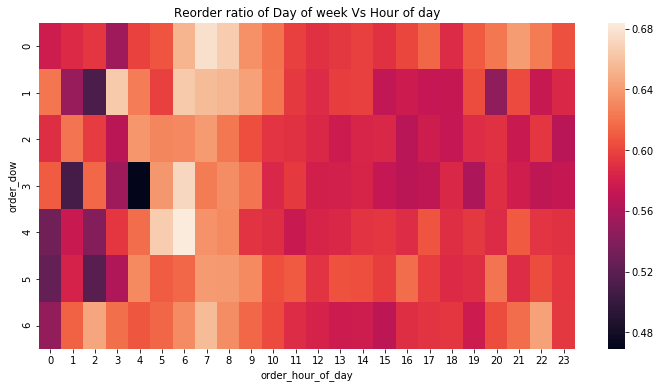

In [34]:
order_products_train_df = pd.merge(order_products_train_df, orders_df, on='order_id', how='left')

grouped_df = order_products_train_df.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()